In [32]:
import os

In [33]:
os.listdir()

['.config', 'sample_data']

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.12.0'

In [36]:
tf.keras.__version__

'2.12.0'

In [37]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [39]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

In [40]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [41]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [42]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [43]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [44]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

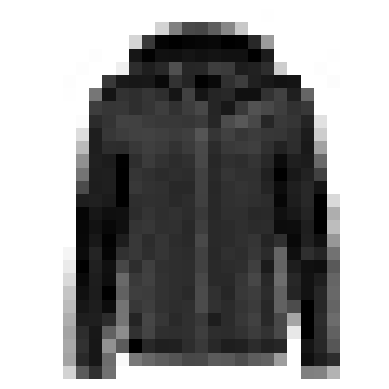

4

In [45]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

<Axes: >

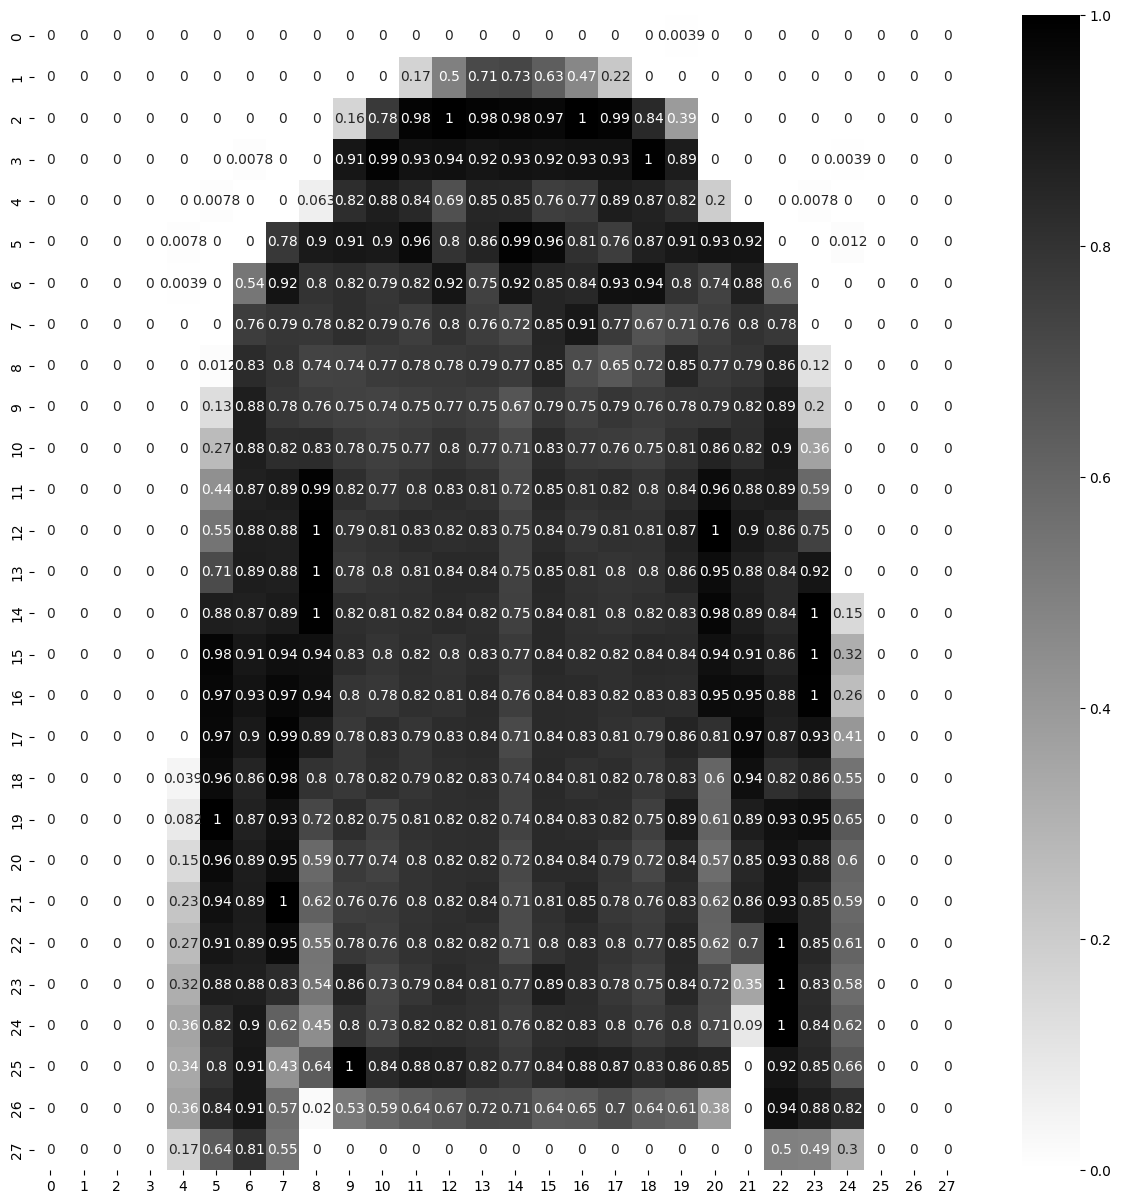

In [46]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [47]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [48]:
model = tf.keras.models.Sequential(LAYERS)

In [49]:
model.layers

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [51]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [52]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [53]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [54]:
hidden1.get_weights()

[array([[-0.00654087, -0.00175183, -0.00749082, ...,  0.00826529,
          0.0556241 , -0.02565411],
        [-0.05753011,  0.05989644,  0.05030558, ..., -0.05473804,
         -0.02921015, -0.01923503],
        [ 0.03357566,  0.01310524,  0.00784281, ..., -0.05427191,
          0.03569369,  0.0355308 ],
        ...,
        [-0.05774452, -0.02504634,  0.02676344, ..., -0.03876677,
         -0.04653648, -0.04253715],
        [-0.0665921 , -0.00678984, -0.03621523, ...,  0.00495202,
          0.02996848, -0.04041579],
        [ 0.04233139, -0.01756443, -0.02733389, ..., -0.07397052,
          0.01311416, -0.02287596]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [55]:
weights, biases = hidden1.get_weights()

In [56]:
weights.shape

(784, 300)

In [57]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [58]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [59]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7117 - accuracy: 0.7646 - val_loss: 0.4996 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4846 - accuracy: 0.8313 - val_loss: 0.5170 - val_accuracy: 0.8056
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4396 - accuracy: 0.8470 - val_loss: 0.4286 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4132 - accuracy: 0.8553 - val_loss: 0.4124 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3929 - accuracy: 0.8618 - val_loss: 0.4380 - val_accuracy: 0.8416
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3753 - accuracy: 0.8683 - val_loss: 0.3798 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3627 - accuracy: 0.8710 - val_loss: 0.3775 - val_accu

In [60]:
55000 / 16

3437.5

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3392 - accuracy: 0.8769


[0.33923453092575073, 0.8769000172615051]

In [62]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.711702,0.764636,0.499595,0.8300
1,0.484568,0.831273,0.517008,0.8056
2,0.439637,0.847018,0.428638,0.8532
3,0.413164,0.855255,0.412401,0.8572
4,0.392877,0.861836,0.438008,0.8416
5,0.375264,0.868345,0.379848,0.8666
6,0.362685,0.870982,0.377480,0.8650
7,0.351236,0.875164,0.352204,0.8784
8,0.339984,0.879800,0.351171,0.8752
9,0.331203,0.881855,0.347982,0.8734


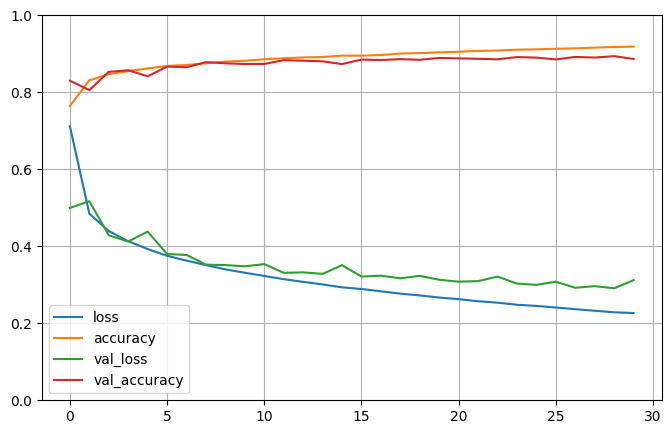

In [63]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
del model

BN APPROACH ONE

In [69]:
Layers_one=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer1" ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',name='hiddenlayer1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',name='hiddenlayer2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax',name='outuputlayer1'),
]

In [70]:
model = tf.keras.models.Sequential(Layers_one)
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

In [71]:
model.layers

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer1 (Flatten)       (None, 784)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_6 (Batc  (None, 100)             

In [75]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [76]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5297 - accuracy: 0.8147 - val_loss: 0.3787 - val_accuracy: 0.8692
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3904 - accuracy: 0.8607 - val_loss: 0.3463 - val_accuracy: 0.8764
Epoch 3/5
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3506 - accuracy: 0.8740 - val_loss: 0.3420 - val_accuracy: 0.8792
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3225 - accuracy: 0.8830 - val_loss: 0.3264 - val_accuracy: 0.8832
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3055 - accuracy: 0.8892 - val_loss: 0.3253 - val_accuracy: 0.8838


BN APPROACH TWO-: BATCH NORMALIZATION IS APPLIED BETWEEN ACTIVATION LAYER AND HIDDEN LAYER AS SHOWN BELOW.

In [ ]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]